# Simple Machine Learning Models Example

This notebook shows the examples of running all the models implemented in this directory. We use scikit-learn to generate random data for classification and regression. You can also run the [python file](train.py) to see the results as well.

Firstly, we need to install and import all the dependent libraries and models we implemented.

In [1]:
! pip install -r requirements.txt

from models import *
import time
import numpy as np
import sklearn.cluster
from models.tools import *

We then define the training process.

In [2]:
# Set random state for reproducibility
random_state = 4

def train(name: str, *args, n_samples = 1000, n_features = 2, sep = 1.5, n_clusters = 2):
    model_selected = None

    for m in models:
        if name.lower().replace(" ", "") == m.name.lower().replace(" ", ""):
            model_selected = m
            break

    if model_selected is None:
        raise NameError("The model you entered does not exist!")

    init = time.time()
    
    model = model_selected(n_features, *args)

    print(f"Training {model_selected.name} model...")

    if isinstance(model, Classifier):
        # Classification models
        if model_selected is not SoftmaxRegression:
            train_x, test_x, train_y, test_y = get_classification_data(samples = n_samples, features = n_features,
                                                                       sep = sep,
                                                                       clusters = n_clusters, 
                                                                       random_state = random_state)
        else:
            train_x, test_x, train_y, test_y = get_classification_data(samples = n_samples, features = n_features,
                                                                       classes = args[0], sep = sep, 
                                                                       random_state = random_state)

        model.train(train_x, train_y)
        pred = model.predict(test_x)
        
        print("Accuracy: %.2f" % (np.sum(pred == test_y) / len(test_y) * 100) + "%")
        print("Time: %.5fms" % ((time.time() - init) * 1000))

        show(test_x, pred, test_y, model.name)
    elif isinstance(model, Regressor):
        # Regression models
        train_x, test_x, train_y, test_y = get_regression_data(samples = n_samples, features = n_features, 
                                                                       random_state = random_state)

        model.train(train_x, train_y)
        pred = model.predict(test_x)

        mse = np.sum((pred - test_y) ** 2)

        print("Loss:", mse / len(test_y))
        print("Time: %.5fms" % ((time.time() - init) * 1000))

        if n_features == 1:
            show_trendline(test_x, test_y, model, model.name)
    elif isinstance(model, Unsupervised):
        # Unsupervised models
        x, y = get_classification_data(samples = n_samples, features = n_features, sep = sep, supervised = False, 
                                                                       random_state = random_state)

        pred = model.train(x)
        print("Time: %.5fms" % ((time.time() - init) * 1000))

        show(x, pred, None, model.name)

## Models

Below shows all the results of the models. For each model, we define a list of hyperparamters that can be changed to see how they affect the training processes of the models.

### AdaBoost

Training AdaBoost model...
Epoch: 1 Accuracy: 96.25%
Epoch: 2 Accuracy: 96.00%
Epoch: 3 Accuracy: 96.25%
Epoch: 4 Accuracy: 95.38%
Epoch: 5 Accuracy: 95.38%
Epoch: 6 Accuracy: 94.12%
Epoch: 7 Accuracy: 93.00%
Epoch: 8 Accuracy: 94.12%
Epoch: 9 Accuracy: 93.00%
Epoch: 10 Accuracy: 94.12%
Accuracy: 97.00%
Time: 1171.63205ms


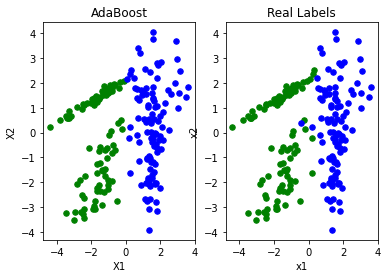

In [3]:
n_features = 2  # # of features
n_predictors = 10  # # of classifiers for ensemble models
max_depth = 1  # Max depth for decision tree

train("AdaBoost", n_predictors, max_depth, n_features = n_features)

### DBSCAN

Training DBSCAN model...
Time: 15561.69033ms


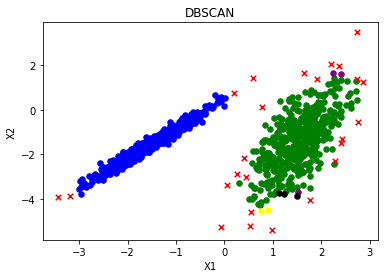

In [4]:
n_features = 2  # # of features
n_clusters = 2  # # of clusters for unsupervised models
eps = .3
min_samples = 5
train("DBSCAN", eps, min_samples, n_features = n_features)

### Decision Tree

#### Decision Tree Classifier

Training decision tree classifier model...
Accuracy: 96.50%
Time: 551.35632ms


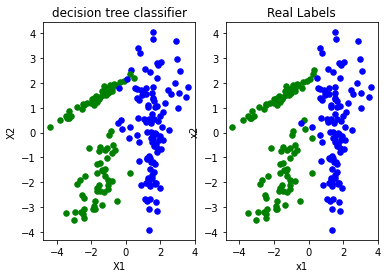

In [5]:
n_features = 2  # # of features
max_depth = 5  # Max depth for decision tree

train("decision tree classifier", max_depth, n_features = n_features)

#### Decision Tree Regressor

Training decision tree regressor model...
Loss: 183.51865725057732
Time: 2871.03558ms


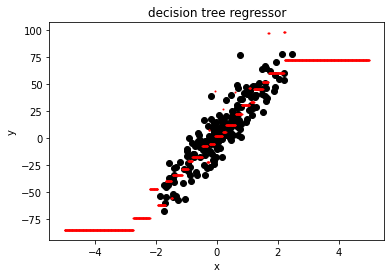

In [6]:
n_features = 1  # # of features
max_depth = 5  # Max depth for decision tree

train("decision tree regressor", max_depth, n_features = n_features)

### GDA

Training GDA model...
Accuracy: 97.50%
Time: 87.00514ms


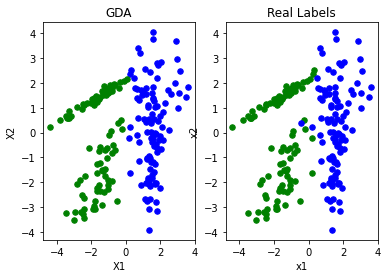

In [7]:
n_samples = 1000  # # of samples
n_features = 2  # # of features

train("GDA", n_samples = n_samples, n_features = n_features)

### Gradient Boost

Training gradient boost model...
Epoch: 1 MSE: 227.397235
Epoch: 2 MSE: 220.166432
Epoch: 3 MSE: 213.407476
Epoch: 4 MSE: 208.687897
Epoch: 5 MSE: 196.826227
Epoch: 6 MSE: 190.919540
Epoch: 7 MSE: 183.716238
Epoch: 8 MSE: 179.871416
Epoch: 9 MSE: 176.172258
Epoch: 10 MSE: 171.785641
Loss: 201.0182232101124
Time: 33684.68022ms


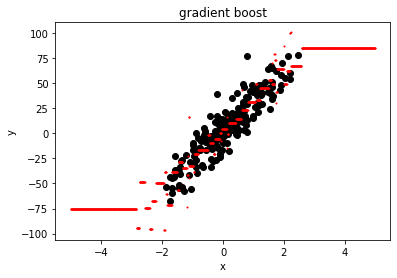

In [8]:
n_features = 1  # # of features
max_depth = 3  # Max depth for decision tree
n_predictor = 10  # # of classifiers for ensemble models

train("Gradient Boost", n_predictors, max_depth, n_features = n_features)

### K-Means

Training K-Means model...
Epoch: 1 Loss: 1465.64503
Epoch: 2 Loss: 1191.37527
Epoch: 3 Loss: 1040.63649
Epoch: 4 Loss: 1007.53886
Epoch: 5 Loss: 1004.75580
Epoch: 6 Loss: 1004.75580
Time: 565.56702ms


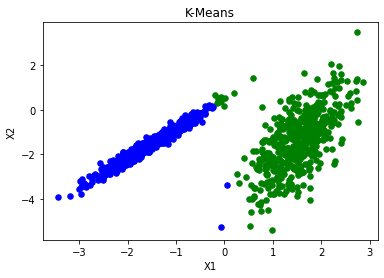

In [9]:
n_features = 2  # # of features
n_clusters = 2  # # of clusters for unsupervised models

train("K-Means", n_clusters, n_features = n_features)

### Linear Regression

#### Batch Gradient Descend

Training linear regression model...
Epoch: 10 Loss: 170.15798
Epoch: 20 Loss: 121.65940
Loss: 162.15382910638368
Time: 5.40423ms


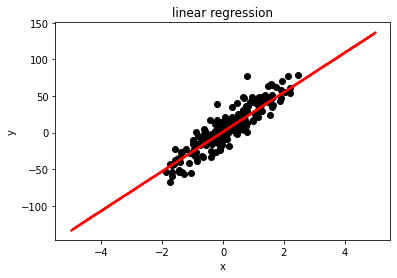

In [10]:
n_features = 1  # # of features

train("linear regression", "bgd", n_features = n_features)

#### Stochastic Gradient Descend

Training linear regression model...
Loss: 182.44891178614446
Time: 4.94790ms


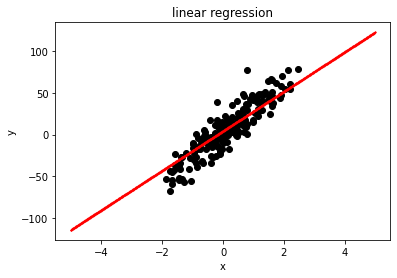

In [11]:
n_features = 1  # # of features

train("linear regression", "sgd", n_features = n_features)

#### Normal Equation

Training linear regression model...
Loss: 159.76661634853514
Time: 3.62182ms


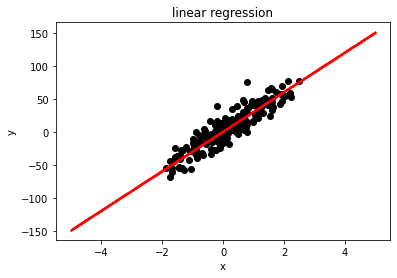

In [12]:
n_features = 1  # # of features

train("linear regression", "ne", n_features = n_features)

#### Locally Weighted Regressor

Training linear regression model...
Loss: 219.14342486241955
Time: 3018.37039ms


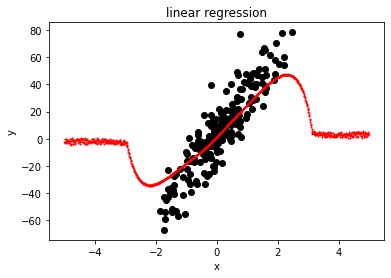

In [13]:
n_features = 1  # # of features

train("linear regression", "lwr", n_features = n_features)

### Logistic Regressor

Training logistic regression model...
Epoch: 1 Accuracy: 69.75%
Epoch: 2 Accuracy: 70.75%
Epoch: 3 Accuracy: 71.75%
Epoch: 4 Accuracy: 72.50%
Epoch: 5 Accuracy: 73.38%
Epoch: 6 Accuracy: 73.62%
Epoch: 7 Accuracy: 74.88%
Epoch: 8 Accuracy: 75.75%
Epoch: 9 Accuracy: 76.88%
Epoch: 10 Accuracy: 77.88%
Epoch: 11 Accuracy: 79.00%
Epoch: 12 Accuracy: 79.38%
Epoch: 13 Accuracy: 80.12%
Epoch: 14 Accuracy: 80.88%
Epoch: 15 Accuracy: 81.62%
Epoch: 16 Accuracy: 82.75%
Epoch: 17 Accuracy: 83.75%
Epoch: 18 Accuracy: 84.75%
Epoch: 19 Accuracy: 85.75%
Epoch: 20 Accuracy: 86.62%
Epoch: 21 Accuracy: 87.50%
Epoch: 22 Accuracy: 87.75%
Epoch: 23 Accuracy: 88.75%
Epoch: 24 Accuracy: 89.00%
Epoch: 25 Accuracy: 89.50%
Epoch: 26 Accuracy: 89.75%
Epoch: 27 Accuracy: 90.25%
Epoch: 28 Accuracy: 90.88%
Epoch: 29 Accuracy: 91.00%
Epoch: 30 Accuracy: 91.25%
Epoch: 31 Accuracy: 91.62%
Epoch: 32 Accuracy: 91.62%
Accuracy: 94.50%
Time: 826.47824ms


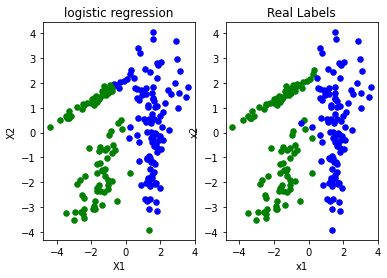

In [14]:
n_features = 2  # # of features

train("logistic regression", n_features = n_features)

### Naive Bayes

Training naive Bayes model...
Accuracy: 92.50%
Time: 12.02035ms


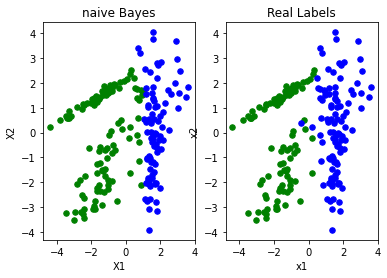

In [15]:
n_features = 2  # # of features

train("naive bayes", n_features = n_features)

### Random Forest

#### Random Forest Classifier

Training random forest classifier model...
Accuracy: 97.00%
Time: 3209.42926ms


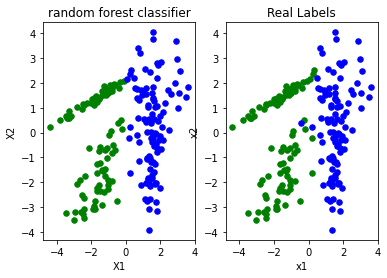

In [16]:
n_features = 2  # # of features
max_depth = 3  # Max depth for decision tree
n_predictor = 10  # # of classifiers for ensemble models

train("random forest classifier", n_predictor, max_depth, n_features = n_features)

#### Random Forest Regressor

Training random forest regressor model...
Loss: 167.46384585854773
Time: 25152.62246ms


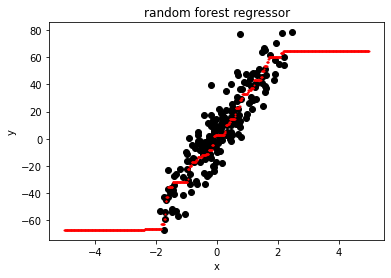

In [17]:
n_features = 1  # # of features
max_depth = 3  # Max depth for decision tree
n_predictor = 10  # # of classifiers for ensemble models

train("random forest regressor", n_predictor, max_depth, n_features = n_features)

### Softmax Regressor

Training softmax regression model...
Epoch: 1 Loss: 1495.72222
Epoch: 2 Loss: 1366.88690
Epoch: 3 Loss: 1251.20480
Epoch: 4 Loss: 1148.42972
Epoch: 5 Loss: 1058.02374
Epoch: 6 Loss: 979.12617
Epoch: 7 Loss: 910.61043
Epoch: 8 Loss: 851.20875
Epoch: 9 Loss: 799.65009
Epoch: 10 Loss: 754.76182
Epoch: 11 Loss: 715.51958
Epoch: 12 Loss: 681.05607
Epoch: 13 Loss: 650.64777
Epoch: 14 Loss: 623.69380
Epoch: 15 Loss: 599.69451
Epoch: 16 Loss: 578.23298
Epoch: 17 Loss: 558.95979
Epoch: 18 Loss: 541.58091
Epoch: 19 Loss: 525.84798
Epoch: 20 Loss: 511.55053
Epoch: 21 Loss: 498.50962
Epoch: 22 Loss: 486.57270
Epoch: 23 Loss: 475.60929
Epoch: 24 Loss: 465.50747
Epoch: 25 Loss: 456.17094
Epoch: 26 Loss: 447.51658
Epoch: 27 Loss: 439.47241
Epoch: 28 Loss: 431.97590
Epoch: 29 Loss: 424.97254
Epoch: 30 Loss: 418.41466
Epoch: 31 Loss: 412.26043
Epoch: 32 Loss: 406.47304
Epoch: 33 Loss: 401.01998
Epoch: 34 Loss: 395.87245
Epoch: 35 Loss: 391.00486
Epoch: 36 Loss: 386.39442
Epoch: 37 Loss: 382.02074
Epoch

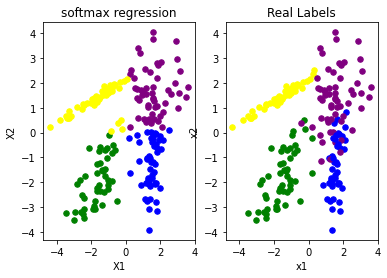

In [18]:
n_features = 2  # # of features
n_classes = 4  # # of classes for softmax regression

train("softmax regression", n_classes, n_features = n_features)

### Stacking Regressor

Training stacking regressor model...
Loss: 191.28912644684408
Time: 7293.90669ms


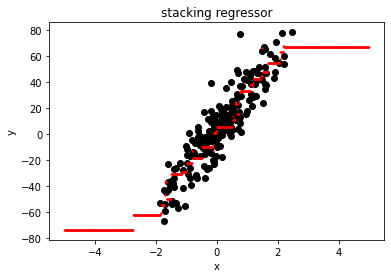

In [19]:
n_features = 1  # # of features
max_depth = 3  # Max depth for decision tree
n_predictor = 10  # # of classifiers for ensemble models

train("stacking regressor", n_predictor, max_depth, n_features = n_features)